# Исследование объявлений о продаже квартир

**Цели и задачи:** Определить рыночную стоимость объектов недвижимости. Задача — установить параметры для построения автоматизированной системы поиска аномалий и мошеннической деятельности.

**План выполнения работы:**
- 1. Изучение данных  
- 2. Предобработка данных  
- 3. Добавление дополнительных данных в таблицу  
- 4. Исследовательский анализ данных  
    - 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков  
    - 4.2 Изучение времени продажи квартиры  
    - 4.3 Поиск редких и выбивающихся значений  
    - 4.4 Поиск факторов влияющих на стоимость квартиры  
    - 4.5 Исследование стоимости квадратного метра в различных районах  
    - 4.6 Определение границы центрального района в Санкт-Петербурге  
    - 4.7 Исследование квартир в центральном районе Санкт-Петербурга  
- 5. Общий вывод  

**Описание данных:**  
Данные сервиса объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
Присутствуют как автоматически собираемые, так и вручную заполненные данные.  
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении  
*Пояснение:* апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Шаг 1. Изучение данных. 

Подключаем библиотеки:
- `pandas` для работы с таблицами,  
- `matplotlib` для визуализации данных
- `display` для вывода табличных данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
real_estate = pd.read_csv('real_estate_data.csv',sep='\t')
# выведем первые 10 строк таблицы с помощью метода head()
display(real_estate.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# с помощью метода info() изучим структуру таблицы: типы данных, колличество строк, столбцов, пропущенных данных.
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Выводы

Данные успешно прочитаны из .csv файла и сохранены в переменной `real_estate`. Данные представляют собой 22 переменные и 23699 записей. Обнаружено достаточно много пропущенных данных в столбцах `ceiling_height`, `is_apartment`, `balcony`, `parks_nearest`, `ponds_nearest` и др. Далее рассмотрим каждый отдельный столбец данных для обработки пропущенных и недостоверных значений.

## Шаг 2. Предобработка данных

Рассмотрим данные в столбцах для выявления пропущенных и недостоверных данных. 

- Начнём с колличества комнат (столбец `rooms`). 

In [4]:
# рассмотрим распределение колличества комнат в таблице методом value_counts()
display(real_estate['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Колличество комнат не может быть равно 0 (таких значений 197). Скорее всего эти данные не были заполнены, или 0 внесли по ошибке. Взглянем на общую площадь квартир таких объявлений. Построим гистаграмму распределения `total_area` при `rooms` = 0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289C8823B80>]],
      dtype=object)

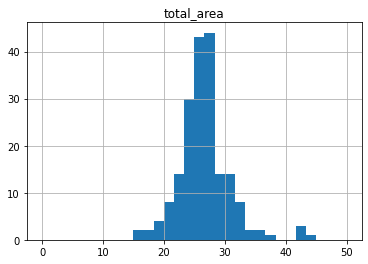

In [5]:
# методом loc[] выделим строки с 'rooms' == 0, построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 30 участков (параметр bins=30), ограничимся значением 'total_area' < 50 (м²)
real_estate.loc[real_estate['rooms'] == 0].hist('total_area', bins=30, range=(0, 50))

Квартиры с площадью меньше 40 м² скорее всего однокомнатные. Заменим значение `rooms` в таких объявлениях на 1.  
В квартирах с большей площадью сложно судить о колличестве комнат. Оставим в таких записях нули и запомним, что колличество комнат в них неизвестно.

In [6]:
# В срезе данных где `rooms` = 0 и `total_area` < 40 запишем: `rooms` = 1.
real_estate.loc[(real_estate['rooms'] == 0) & (real_estate['total_area'] < 40), 'rooms'] = 1
# Выведем колличество оставшихся записей с нулевым значением `rooms`
print('Колличество объявлений с нулевым колличеством комнат:', len(real_estate.loc[(real_estate['rooms'] == 0)]))

Колличество объявлений с нулевым колличеством комнат: 9


- Рассмотрим цену квартир в столбце `last_price`.  

В данном столбце нет пропусков, но тип данных можно заменить на целый. Дробная часть не вносит искажение в данные, но целый тип данных занимает меньше места

In [7]:
real_estate['last_price'] = real_estate['last_price'].astype('int64')

- Рассмотрим дату публикации в столбце `first_day_exposition`.

Данные представляют собой дату публикации объявления. Преобразуем тип данных из `object` в `datetime` с помощью метода `to_datetime`.

In [8]:
# формат даты передадим методу to_datetime с помощью параметра format.
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

- Рассмотрим высоту потолков в столбце `ceiling_height`.

In [9]:
print('Колличество пропущенных значений в ceiling_height:', len(real_estate.loc[real_estate['ceiling_height'].isna()]))

Колличество пропущенных значений в ceiling_height: 9195


Пропущено много данных (почти 50%), удалить их нельзя. Составители заявлений могли не внести эти данные, или информация утеряна в результатее сбоя системы при загрузке/выгрузке базы данных.  
Пропуски можно было бы заменить на значения из других объявлений в тех же домах, но информации об адресах квартир в нет.  
Замена значений на средние или медианные может внести искажения в распределение данных. При возможности, необходимо восстановить данные по адресам домов или обратиться к владельцам данных.  
На данном этапе оставим значения пустыми.  

- Рассмотрим общее колличество этажей в доме в столбце `floors_total`.

In [10]:
print('Колличество пропущенных значений в floors_total:', len(real_estate.loc[real_estate['floors_total'].isna()]))
display(real_estate.loc[real_estate['floors_total'].isna()].head(10))

Колличество пропущенных значений в floors_total: 86


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Пропусков немного. Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные также могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.   
Замена небольшого колличества пропусков средним или медианным значением не внесёт сильного искажения в распределение данных. Но такие замены могут внести искажения во влияние расположения квартир на их стоимость (последний этаж - стоимость). На данном этапе удалим строки с пропусками.  

In [11]:
real_estate = real_estate.loc[~(real_estate['floors_total'].isna())]
print('Колличество оставшихся записей:', len(real_estate))

Колличество оставшихся записей: 23613


Также заметим, что тип данных `floors_total` вещественный `float64`. Однако колличество этажей - величина целая. Заменим тип данных на целочисленный `int64`.

In [12]:
real_estate['floors_total'] = real_estate['floors_total'].astype('int64')

- Рассмотрим жилую площадь в столбце `living_area`.

In [13]:
print('Колличество пропущенных значений в living_area:', len(real_estate.loc[real_estate['living_area'].isna()]))
display(real_estate.loc[real_estate['living_area'].isna()].head(10))

Колличество пропущенных значений в living_area: 1870


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.8,2018-02-19,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.8,2017-10-28,2,2.5,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.0,2018-11-18,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000,46.5,2017-03-06,1,NaN,13,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000,35.0,2018-01-01,1,NaN,12,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000,80.5,2018-01-15,3,NaN,25,NaN,16,NaN,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
116,18,10999000,97.2,2017-11-13,3,2.5,16,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0


Пропусков в данном столбце достаточно много (около 8% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

- Рассмотрим принадлежность недвижимости к аппартаментам в столбце `is_apartment`

In [14]:
print('Колличество пропущенных значений в is_apartment:', len(real_estate.loc[real_estate['is_apartment'].isna()]))

Колличество пропущенных значений в is_apartment: 20838


В данном столбце очень много пропущенных данных. Возможно, данные не были заполнены изначально или были утеряны в результате сбоя системы при загрузке/выгрузке базы данных. В дальнейшем исследовании нам не понадобится информация в этом столбце. Пропуски можно оставить как есть.  
Тип данных в столбце is_apartment `object`, хотя переменная принимает только значения True и False. На булев тип данных также указывает описание таблицы. Произведем преобразование типа данных из `object` в `bool`

In [15]:
real_estate['is_apartment'] = real_estate['is_apartment'].astype('bool')

- Рассмотрим площадь кухни в столбце `kitchen_area`.

In [16]:
print('Колличество пропущенных значений в kitchen_area:', len(real_estate.loc[real_estate['kitchen_area'].isna()]))
display(real_estate.loc[real_estate['kitchen_area'].isna()].head(10))

Колличество пропущенных значений в kitchen_area: 2231


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000,32.8,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.8,2017-10-28,2,2.5,5,NaN,1,True,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.0,2018-11-18,1,NaN,22,NaN,3,True,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000,46.5,2017-03-06,1,NaN,13,NaN,13,True,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000,35.0,2018-01-01,1,NaN,12,NaN,8,True,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,True,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000,80.5,2018-01-15,3,NaN,25,NaN,16,True,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000,31.0,2018-03-23,1,NaN,25,NaN,6,True,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000,27.0,2017-03-30,1,NaN,24,15.5,2,True,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Пропусков в данном столбце достаточно много (порядка 10% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

- Рассмотрим колличество балконов в столбце `balcony`.

In [17]:
display(real_estate.loc[real_estate['balcony'].isna()].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
16,11,6700000,82.00,2017-11-23,3,3.05,5,55.60,1,True,...,9.00,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
19,16,14200000,121.00,2019-01-09,3,2.75,16,76.00,8,True,...,12.00,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
23,11,2950000,32.00,2016-10-29,1,2.60,9,17.70,9,True,...,6.10,NaN,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
26,6,4050000,60.00,2017-04-28,4,NaN,5,43.00,4,True,...,7.00,NaN,Санкт-Петербург,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0
30,12,2200000,32.80,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Пропусков в данном столбце достаточно много (около 50% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Пропуски скорее всего связаны с отсутствием балкона в квартире. Заменим пропуски на 0.  
Также заменим тип данных в этом столбце с `float64` на `int64`, так как колличество балконов - величина целая.

In [18]:
# заменим пропущенные в столбце `balcony` данные на 0 с помощью метода `fillna`. 
# параметр inplace=True для замены данных в существующей таблице на месте.
real_estate['balcony'].fillna(0, inplace=True)

# заменим тип данных в столбце `balcony` методом astype()
real_estate['balcony'] = real_estate['balcony'].astype('int64')

- Рассмотрим название населённого пункта в столбце `locality_name`.

In [19]:
print('Колличество пропущенных значений в locality_name:', len(real_estate.loc[real_estate['locality_name'].isna()]))
display(real_estate.loc[real_estate['locality_name'].isna()].head(10))

Колличество пропущенных значений в locality_name: 48


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.7,2016-04-15,3,3.55,5,50.80,2,True,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000,80.0,2017-05-30,3,NaN,4,42.60,2,True,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765,42.7,2015-09-20,1,NaN,24,15.60,3,True,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593,62.4,2015-10-11,2,NaN,24,33.10,21,True,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000,46.5,2016-05-28,2,NaN,5,30.80,5,True,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000,89.5,2014-12-09,2,3.00,8,39.62,7,True,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000,80.0,2015-12-10,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000,83.0,2015-08-14,3,NaN,7,NaN,6,True,...,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000,85.5,2016-01-20,3,NaN,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000,30.0,2016-04-29,1,NaN,24,20.00,23,True,...,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Пропусков в данном столбце немного (48 записей). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены, удаленность от аэропортов и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. Заменим пропуски на значение `Неизвестно`  

In [20]:
real_estate['locality_name'].fillna('Неизвестно', inplace=True)

- Рассмотрим расстояние до ближайшего аэропорта в столбце `airports_nearest`.

In [21]:
print('Колличество пропущенных значений в airports_nearest:', len(real_estate.loc[real_estate['airports_nearest'].isna()]))
display(real_estate.loc[real_estate['airports_nearest'].isna()].head(10))

Колличество пропущенных значений в airports_nearest: 5532


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,True,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,True,...,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000,56.10,2018-10-18,3,NaN,4,42.50,3,True,...,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000,35.00,2018-01-01,1,NaN,12,NaN,8,True,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.80,5,True,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

- Рассмотрим расстояние до центра в столбце `cityCenters_nearest`.

In [22]:
print('Колличество пропущенных значений в cityCenters_nearest:', len(real_estate.loc[real_estate['cityCenters_nearest'].isna()]))
display(real_estate.loc[real_estate['cityCenters_nearest'].isna()].head(10))

Колличество пропущенных значений в cityCenters_nearest: 5509


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,True,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,True,...,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000,56.10,2018-10-18,3,NaN,4,42.50,3,True,...,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000,35.00,2018-01-01,1,NaN,12,NaN,8,True,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.80,5,True,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

- Рассмотрим число парков в радиусе 3 км в столбце `parks_around3000`.

In [23]:
print('Колличество пропущенных значений в parks_around3000:', len(real_estate.loc[real_estate['parks_around3000'].isna()]))
display(real_estate.loc[real_estate['parks_around3000'].isna()].head(10))

Колличество пропущенных значений в parks_around3000: 5508


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,True,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,True,...,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000,56.10,2018-10-18,3,NaN,4,42.50,3,True,...,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000,35.00,2018-01-01,1,NaN,12,NaN,8,True,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.80,5,True,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
На данном этапе оставим пропуски как есть, так как их слишком много.

- Рассмотрим расстояние до ближайшего парка в столбце `parks_nearest`.

In [24]:
print('Колличество пропущенных значений в parks_nearest:', len(real_estate.loc[real_estate['parks_nearest'].isna()]))
display(real_estate.loc[real_estate['parks_nearest'].isna()].head(10))

Колличество пропущенных значений в parks_nearest: 15568


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.5,9,43.60,7,True,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000,36.00,2016-06-23,1,NaN,6,17.00,1,True,...,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000,36.00,2016-09-09,1,NaN,17,16.50,7,True,...,11.00,1,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0


Пропусков в данном столбце достаточно много (порядка 65% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления (по причине отсутствия парков вблизи квартиры) или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

- Рассмотрим число водоёмов в радиусе 3 км в столбце `ponds_around3000`.

In [25]:
print('Колличество пропущенных значений в ponds_around3000:', len(real_estate.loc[real_estate['ponds_around3000'].isna()]))
display(real_estate.loc[real_estate['ponds_around3000'].isna()].head(10))

Колличество пропущенных значений в ponds_around3000: 5508


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,NaN,9,NaN,2,True,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,True,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,True,...,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000,56.10,2018-10-18,3,NaN,4,42.50,3,True,...,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000,35.00,2018-01-01,1,NaN,12,NaN,8,True,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.80,5,True,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
На данном этапе предположим, что пропуски остались по причине отсутствия водоёмов в радиусе 3 км и заменим их на `0`.  
На данном этапе оставим пропуски как есть, так как их слишком много.

- Рассмотрим расстояние до ближайшего водоёма в столбце `ponds_nearest`.

In [26]:
print('Колличество пропущенных значений в parks_nearest:', len(real_estate.loc[real_estate['parks_nearest'].isna()]))
display(real_estate.loc[real_estate['parks_nearest'].isna()].head(10))

Колличество пропущенных значений в parks_nearest: 15568


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.5,9,43.60,7,True,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000,36.00,2016-06-23,1,NaN,6,17.00,1,True,...,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000,36.00,2016-09-09,1,NaN,17,16.50,7,True,...,11.00,1,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0


Пропусков в данном столбце достаточно много (около 60% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления (по причине отсутствия парков вблизи квартиры) или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

- Рассмотрим колличество дней, которое объявление было размещено. Столбец `days_exposition`.

In [27]:
print('Колличество пропущенных значений в days_exposition:', len(real_estate.loc[real_estate['days_exposition'].isna()]))
display(real_estate.loc[real_estate['days_exposition'].isna()].head(10))

Колличество пропущенных значений в days_exposition: 3172


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,True,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000,40.0,2018-11-18,1,NaN,22,NaN,3,True,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000,50.6,2018-12-02,2,2.65,9,30.30,7,True,...,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000,52.1,2019-01-31,2,2.60,24,29.70,9,True,...,8.3,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000,30.8,2018-11-22,1,2.50,9,18.00,7,True,...,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000,136.0,2017-09-22,6,3.00,2,94.00,2,True,...,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000,57.5,2019-03-27,3,2.50,9,39.00,8,True,...,6.2,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,True,...,NaN,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000,43.9,2019-03-13,2,NaN,2,27.46,1,True,...,5.2,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропусков в данном столбце достаточно много (порядка 13% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд.).  
Данные могли быть утеряны в результате сбоя системы при выгрузке базы.  
Также возможно информация не была внесена системой, так как объявление не было снято в момент выгрузки данных.    
Информацию можно восстановить при обращении к владельцам данных.   
На данном этапе предположим, что объявления с пропусками не были сняты и оставим их как есть.  

Отобразим конечный результат после предобработки.  

In [28]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

### Выводы

- Данные в таблице содержат больщое колличество пропусков (до 65% в столбце).  
- Пропуски были проанализированы и по возможности заполнены (например пропущенные значения в колличестве балконов заменены на 0).  
- Возможные причины пропусков приведены для каждой переменной. Основными причинами являются отсутствие информации при заполнении объявления и сбои в работе системы при загрузке/выгрузке базы данных.  
- Дополнительно был проанализирован столбец `rooms`. Нулевые значения были заменены на 1 (1-комнатная квартира) при общей площади квартиры `total_area` < 40 м²  
- Типы данных были преобразованы в соответствии с описанием таблицы и смыслом хранимой информации.

## Шаг 3. Добавление дополнительных данных в таблицу

**1)** Посчитаем цену квадратного метра квартиры.  
Для этого разделим цену квартиры `last_price` на общую площадь квартиры `total_area`. Округлим полученное значение до одного знака после запятой. Результат запишем в столбец `meter_price`.

In [29]:
# округление произведём с помощью метода round()
real_estate['meter_price'] = round(real_estate['last_price'] / real_estate['total_area'], 1)

**2)** Посчитаем день недели, месяц и год публикации объявления.  
Для этого воспользуемся методом `.dt.weekday`, `.dt.month` и `.dt.year` соответственно.  
Дату публикации возьмём из столбца `first_day_exposition`.  
Полученные данные сохраним в столбцах `publish_weekday`, `publish_month`, `publish_year`

In [30]:
real_estate['publish_weekday'] = real_estate['first_day_exposition'].dt.weekday
real_estate['publish_month'] = real_estate['first_day_exposition'].dt.month
real_estate['publish_year'] = real_estate['first_day_exposition'].dt.year

**3)** Создадим категорию для этажа квартиры.  
Данные возьмём из столбцов `floor` для этажа квартиры и `floors_total` колличества этажей в доме.  
Результат сохраним в столбце `floor_cat`.  
Для определения категории создадим функцию floor_category(). На вход функции поступает строка с данными, внутри сравнивается этаж квартиры с колличеством этажей в доме, и на выход поступает название категории. Далее с помощью метода apply применяем созданную функцию ко всем строкам таблицы.  

In [31]:
#  создадим функцию `floor_category(row)` для нахождения категории этажа квартиры
def floor_category(row):
    """
    input: row - строка, содержит информацию о квартире
    output: (object) - категория этажа квартиры
    Функция принимает на вход строку с данными, 
    сравнивает этаж квартиры `floor` с колличеством этажей в доме `floors_total`
    и возвращает категорию:
    
    Категория:          Описание:
    первый              первый этаж в доме
    последний           последний этаж в доме
    другой              все остальные этажи
    """
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# с помощью метода apply применяем функцию floor_category ко всем строкам таблицы 'real_estate'
real_estate['floor_cat'] = real_estate.apply(floor_category, axis=1)

**4)** Определим соотношение жилой и общей площади квартиры, а также отношение площади кухни к общей.  
Данные возьмём из столбцов `living_area`, `total_area` и `kitchen_area`.  
Результаты вычислений сохраним в столбцах `living_to_total` и `kitchen_to_total` соответственно.  
Результаты округлим до 2 знаков после запятой.  

In [32]:
real_estate['living_to_total'] = round(real_estate['living_area'] / real_estate['total_area'], 2)
real_estate['kitchen_to_total'] = round(real_estate['kitchen_area'] / real_estate['total_area'], 2)

In [33]:
# Конечный вид таблицы:
display(real_estate.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,publish_weekday,publish_month,publish_year,floor_cat,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.0,755.0,NaN,120370.4,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,0.0,NaN,81.0,82920.8,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,2.0,574.0,558.0,92785.7,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,3.0,234.0,424.0,408176.1,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,NaN,NaN,55.0,95065.8,0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,0.0,NaN,155.0,99195.7,3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,0.0,NaN,NaN,110544.7,3,4,2019,другой,NaN,0.26
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,NaN,NaN,189.0,87454.8,2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,289.0,88524.6,6,2,2017,другой,0.71,0.11


### Выводы

- Метрики были успешно посчитаны, исходя из условия задания, и добавлены в основную таблицу.  
- Названия для новых столбцов выбраны, исходя из информации, которая в них хранится.  
- В новых столбцах есть пропущенные значения в тех записях, где были пропуски исходных данных.  

## Шаг 4. Исследовательский анализ данных

### 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков

**1)** Рассмотрим площадь квартир в столбце `total_area`. Построим гистограмму для данного параметра.

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

99-й персентиль значений total_area: 197.2


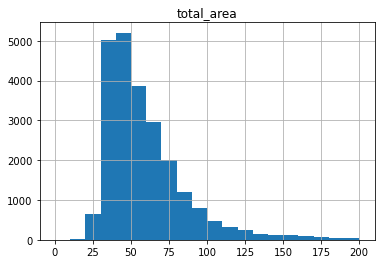

In [34]:
# выведем информацию о распределении значений в параметре total_area методом describe()
display(real_estate['total_area'].describe())
# найдём .99-й квантиль значений total_area с помощью метода .quantile(.99)
print('99-й персентиль значений total_area:', round(real_estate['total_area'].quantile(0.99), 1))
# построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 20 участков (параметр bins=20), ограничимся значением 'total_area' < 200 (м²)
real_estate.hist('total_area', bins=20, range = (0, 200))
plt.show()

- Распределение значений параметра `total_area` близко к распределению Пуассона, без аномальных пиков.  
- Минимальная площадь 12 м², вполне правдоподобное значение, возможно продаётся комната.  
- Максимальное значение - 900 м². Достаточно высокое, но также правдоподобно.  
- 99% значений укладывается в отрезке 12 - 200 м². Остальные случаи можно считать выбросами.  
- Медианное значение (52.0) меньше среднего (60.3), следовательно, данные немного смещены влево. Это нормально: колличество небольших квартир больше, но очень большие по площади вносят вклад в смещение данных.  

**2)** Рассмотрим цену квартир в столбце `last_price`. Построим гистограмму для данного параметра.

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

99-й персентиль значений last_price: 36000000.0


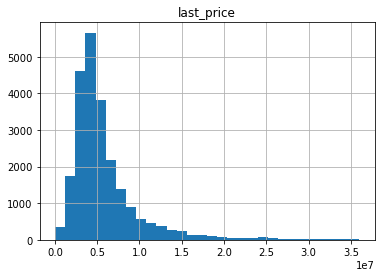

In [35]:
# выведем информацию о распределении значений в параметре last_price методом describe()
display(real_estate['last_price'].describe())
# найдём 99-й персентиль значений last_price с помощью метода .quantile(.99)
print('99-й персентиль значений last_price:', round(real_estate['last_price'].quantile(0.99), 1))
# построим гистаграмму распределения 'last_price' методом hist().
# разделим гистограмму на 30 участков (параметр bins=30), ограничим значения 'last_price' < 3.6*10**7 (.99-й квантиль)
real_estate.hist('last_price', bins=30, range = (0, 3.6*10**7))
plt.show()

- Распределение значений параметра `last_price` близко к распределению Пуассона, без аномальных пиков.  
- Минимальная площадь 12190, достаточно маленькое, но возможное значение.  
- Максимальное значение - 7.6*10^8. Достаточно высокое, но также правдоподобно.  
- 99% значений меньше 3.6*10^7. Остальные случаи можно считать выбросами.  
- Медианное значение 4.7\*10^6 меньше среднего 6.5*10^6, следовательно, данные смещены влево. Это нормально: колличество дешёвых квартир больше, но очень дорогая недвижимость вносит вклад в смещение данных.  

**3)** Рассмотрим число комнат в столбце `rooms`. Построим гистограмму для данного параметра.

count    23613.000000
mean         2.078982
std          1.066875
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

99-й персентиль значений rooms: 5.0


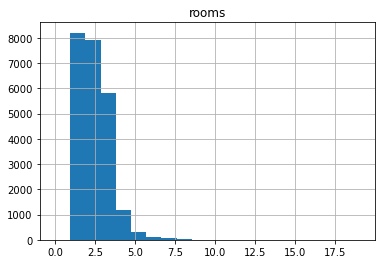

In [36]:
# выведем информацию о распределении значений в параметре rooms методом describe()
display(real_estate['rooms'].describe())
# найдём 99-й персентиль значений rooms с помощью метода .quantile(.99)
print('99-й персентиль значений rooms:', round(real_estate['rooms'].quantile(0.99), 1))
# построим гистаграмму распределения 'rooms' методом hist().
# разделим гистограмму на 20 участков (параметр bins=20)
real_estate.hist('rooms', bins=20)
plt.show()

- Распределение значений параметра `rooms` близко к распределению Пуассона, без аномальных пиков.  
- Аномальные нулевые значения были преобразованы в разделе 2. Осталось 9 нулевых значений, они не внесут большого отклонения  распределение, можно считать их выбросами.  
- Максимальное значение - 19. Достаточно высокое, но правдоподобно.  
- 99% значений меньше 6. Остальные случаи можно считать выбросами.  
- Медианное и среднее значения равны 2, данные практически не смещены, так как абсолютное большинство квартир имеют 1, 2, 3 и 4 комнаты. Разброс значений очень мал.  

**4)** Рассмотрим высоту потолков в столбце `ceiling_height`. Построим гистограмму для данного параметра.

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

99.5-й персентиль значений ceiling_height: 4.1
0.5-й персентиль значений ceiling_height: 2.5


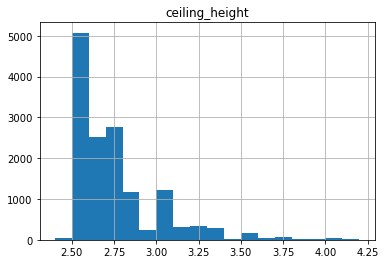

In [37]:
# выведем информацию о распределении значений в параметре ceiling_height методом describe()
display(real_estate['ceiling_height'].describe())
# найдём 99.5-й персентиль значений ceiling_height с помощью метода .quantile(.995)
print('99.5-й персентиль значений ceiling_height:', round(real_estate['ceiling_height'].quantile(0.995), 1))
# найдём 0.5-й персентиль значений ceiling_height с помощью метода .quantile(.05)
print('0.5-й персентиль значений ceiling_height:', round(real_estate['ceiling_height'].quantile(0.005), 1))
# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 18 участков (параметр bins=18), 
# ограничим значения 'ceiling_height' (2.4, 4.2), отбросим 1% аномально высоких и низких значений
real_estate.hist('ceiling_height', bins=18, range = (2.4, 4.2))
plt.show()

- Распределение значений параметра `ceiling_height` близко к распределению Пуассона. Есть небольшое аномальное поведение значении 3 м. Это может быть объяснено особенностью заполнения данных (округляли высоту до 3 м, когда реальная высота 2.9 или 3.1 м).  
- Максимальное значение - 100 м, ошибочное, но таких значений мало: 99% значений меньше 4 м. Остальные случаи можно считать выбросами, они не внесут отклонение в распределение.  
- Минимальное значение - 1 м, скорее всего ошибочное, но таких значений мало: 99% значений больше 2.5 м. Остальные случаи можно считать выбросами, они не внесут большое отклонение в распределение.  
- Медианное и среднее значения равны 2.65 и 2.77 соответственно. Данные практически не смещены, так как абсолютное большинство квартир имеют высоту потолков 2.5 - 3.5 м. Разброс значений небольшой. Отсюда могут быть и небольшие аномалии в распределении Пуассона.    

### 4.2 Изучение времени продажи квартиры

Время продажи квартиры находится в параметре `days_exposition`.  
Для начала определим 1-й и 99-й персентили распределения, чтобы не включать редкие значения в гистограмму.

In [38]:
# найдём 99-й персентиль значений rooms с помощью метода .quantile(.99)
print('99-й персентиль значений days_exposition:', round(real_estate['days_exposition'].quantile(0.99), 1))
# найдём 1-й персентиль значений rooms с помощью метода .quantile(.01)
print('1-й персентиль значений days_exposition:', round(real_estate['days_exposition'].quantile(0.01), 1))

99-й персентиль значений days_exposition: 1067.0
1-й персентиль значений days_exposition: 4.0


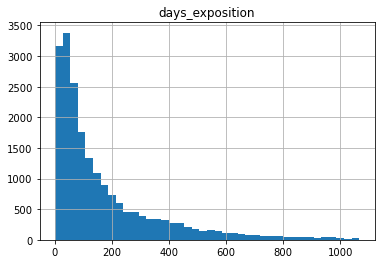

In [39]:
# построим гистаграмму распределения 'days_exposition' методом hist().
# разделим гистограмму на 40 участков (параметр bins=40),
# ограничим гистограмму значениями 0 - 1067
real_estate.hist('days_exposition', bins=40, range=(0,1067))
plt.show()

Теперь рассчитаем среднее, медианное значения, а также посмотрим на распределение значений с помощью метода describe()

In [40]:
print('Среднее значение времени продажи:', round(real_estate['days_exposition'].mean(),0))
print('Медианное значение времени продажи:', round(real_estate['days_exposition'].median(),0))
real_estate['days_exposition'].describe()

Среднее значение времени продажи: 181.0
Медианное значение времени продажи: 95.0


count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Среднее значение в 2 раза больше медианного. Данные сильно смещены влево.  
- Это означает, что большинство квартир проданы за сравнительно небольшой срок **(45 - 232 дней)**, но есть очень долгие объявления, вносящие смещение в данные.  
- 1% объявлений были сняты за **4 и меньше дней**. Можно считать, что это необычно короткий срок.  

Теперь определим, какие сроки можно считать очень долгими. Для начала построим ящик с усами boxplot().

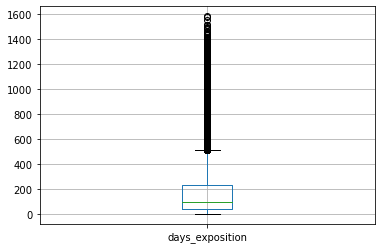

In [41]:
real_estate.boxplot('days_exposition')

- Можно оценить, что верхняя граница, после которой данные можно считать выбросами, находится в районе 500 дней. Но выбросы очень большие (до 1600 дней), поэтому график не очень информативен. Рассчитаем верхнюю границу вручную.  
75%Q + 1.5 \* МКР = 232 + 1.5\*(232 - 45) = 512  
- Время продажи квартиры больше **512 дней** можно считать необычно долгим.

### 4.3 Поиск редких и выбивающихся значений

- Ранее было рассмотрено колличество комнат (столбец `rooms`). Нулевые значения при общей площади < 40 м² были заменены на 1. Осталось 9 нулевых значений. Их можно удалить без ущерба для распределения выборки.  

In [42]:
real_estate = real_estate.loc[real_estate['rooms'] != 0]

- Рассмотрим высоту потолков (столбец `ceiling_height`). Значения < 2.5 м и > 4.1 м скорее всего ошибочны. Таких даннных мало (около 1%). Следовательно, их можно удалить без ущерба распределению.  

In [43]:
real_estate = real_estate.loc[(real_estate['ceiling_height'].isna()) | ((real_estate['ceiling_height'] >= 2.5) \
                              & (real_estate['ceiling_height'] <= 4.1))]

Обновим индексы в таблице после удаления строк методом reset_index()

In [44]:
real_estate = real_estate.reset_index(drop=True)

<a id='секция4.4'></a>
### 4.4 Поиск факторов влияющих на стоимость квартиры

- Рассмотрим влияние на стоимость `last_price`: площади квартиры `total_area`, числа комнат `rooms`, удалённости от центра `cityCenters_nearest`, этажа квартиры `floor_cat`, даты размещения: дня недели, месяца и года (параметры `publish_weekday`, `publish_month` и `publish_year` соответственно).  
- Построим графики зависимостей данных параметров (scatterplot), с помощью метода plot()  
- Стоимость квартиры ограничим значением 3.6 * 10^7 (99% всех значений). Остальные значения будем считать выбросами.  
- Также определим коэффициент корреляции Пирсона для каждой пары параметров.  

Создадим вспомогательную функцию для построения графиков scatterplot. 

In [45]:
def last_price_scatter(column, xrange, need_median=False):
    """
    input: column (str) - название столбца для оси X графика
           xrange (tuple) - пределы значений в столбце column для построения графика
           need_median (bool) - флаг для построения кривой медиан (для каегориальных данных по оси X)
    output: None
    Функция строит scatteplot зависимости цены за квартиру 'last_price' от параметра column. 
    Дополнительно при need_median=True функция считает медианное значение 'last_price' для каждого значения column
    и строит кривую median в тех же осях координат.
    """
    ax = real_estate.plot(x = column,
                          y = 'last_price',
                          kind = 'scatter',         # тип графика
                          style = 'o',              # отображение данных точками
                          alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                          figsize = (8, 4),         # размер графика
                          xlim = xrange,            # пределы по оси x
                          ylim = (0, 3.6*10**7),    # пределы по оси y
                          grid = True               # отобразить сетку
                         )
    if need_median:
        # сгруппируем объявления по column и найдём медианные значения стоимости квартир для каждой группы
        (real_estate
         .groupby(column)['last_price']
         .agg(['median'])
         # отобразим медианы стоимости квартир для разных групп
         .plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,          # отобразить подпись графика
               label = 'median',    # название кривой
               grid = True              # отобразить сетку
              )
        )      
        
    plt.show()

**1)** Зависимость `last_price` от `total_area`.  
Ограничим площадь квартиры значением 198 (99% всех значений), чтобы отбросить редкие выбросы для наглядности.

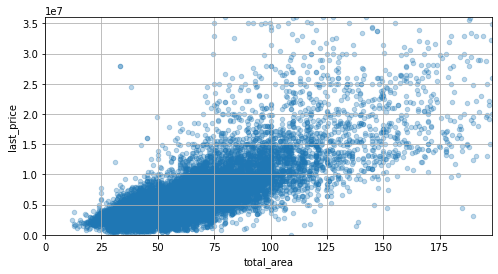

Коэффициент корреляции Пирсона между last_price и total_area: 0.646


In [46]:
# построим график функцией last_price_scatter()
last_price_scatter('total_area', xrange=(0, 198))

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и total_area:', \
      round(real_estate['last_price'].corr(real_estate['total_area']), 3))

- По графику видно, что в среднем стоимость квартиры растёт с увеличением общей площади.  
- Коэффициент корреляции Пирсона 0.646 также подтверждает положительную зависимость. Значение коэффициента не очень высокое, зависимость между параметрами достаточно слабая.   

**2)** Зависимость `last_price` от `rooms`.  
Ограничим колличество комнат значением 7 (99% всех значений), чтобы отбросить редкие выбросы для наглядности.

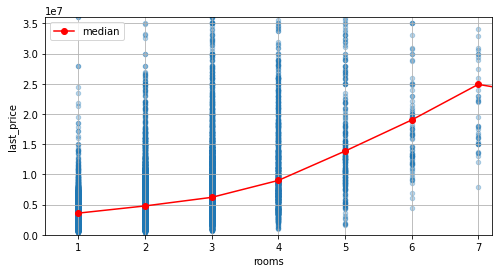

Коэффициент корреляции Пирсона между last_price и rooms: 0.361


In [47]:
# построим график функцией last_price_scatter()
last_price_scatter('rooms', xrange=(0.5, 7.2), need_median=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и rooms:', \
      round(real_estate['last_price'].corr(real_estate['rooms']), 3))

- По графику видно, что в среднем стоимость квартиры растёт с увеличением колличества комнат.  
- Коэффициент корреляции Пирсона 0.361 также подтверждает положительную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.  

**3)** Зависимость `last_price` от `cityCenters_nearest`.  
Ограничим колличество комнат значением 50067 (99% персентиль), чтобы отбросить редкие выбросы для наглядности.

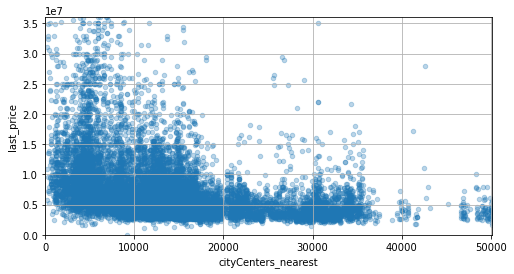

Коэффициент корреляции Пирсона между last_price и cityCenters_nearest: -0.205


In [48]:
# построим график функцией last_price_scatter()
last_price_scatter('cityCenters_nearest', xrange=(0, 50067))

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest:', \
      round(real_estate['last_price'].corr(real_estate['cityCenters_nearest']), 3))

- По графику видно, что в среднем стоимость квартиры падает с увеличением расстояния до центра.  
- Коэффициент корреляции Пирсона -0.205 также подтверждает отрицательную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.  

**4)** Зависимость `last_price` от `floor_cat`.  

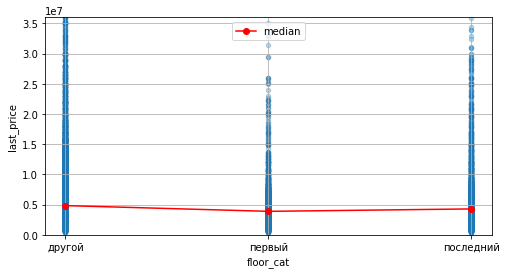

In [49]:
# построим график функцией last_price_scatter()
last_price_scatter('floor_cat', xrange=(-0.1, 2.1), need_median=True)

- По графику видно, что в среднем стоимость квартиры практически не зависит от этажа. На первом этаже стоимость квартир немного ниже, но разница незначительна.  

**5)** Зависимость `last_price` от `publish_weekday`.  

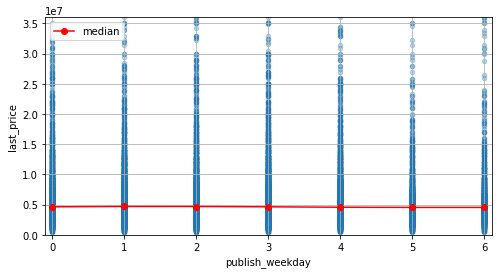

In [50]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_weekday', xrange=(-0.1, 6.1), need_median=True)

- По графику видно, что в среднем стоимость квартиры никак не зависит от дня недели размещения объявления.  

**6)** Зависимость `last_price` от `publish_month`.  

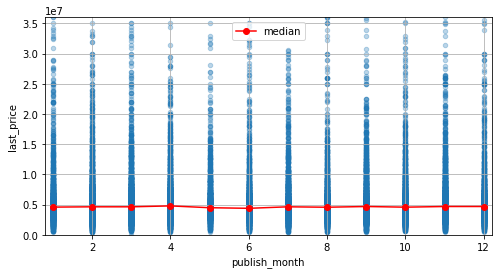

In [51]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_month', xrange=(0.8, 12.2), need_median=True)

- По графику видно, что в среднем стоимость квартиры никак не зависит от месяца размещения объявления.  

**7)** Зависимость `last_price` от `publish_year`.  

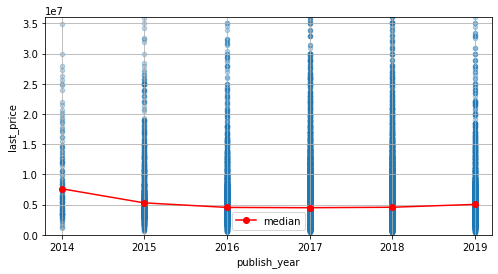

In [52]:
# построим график функцией last_price_scatter()
last_price_scatter('publish_year', xrange=(2013.8, 2019.2), need_median=True)

- На графике видно, что с 2014 по 2016 год наблюдалось снижение стоимости квартир. С 2017 по 2019 год наблюдается незначительное повышение стоимости.  

### 4.5 Исследование стоимости квадратного метра в различных районах

Сгруппируем объявления по названию населённого пункта, посчитаем колличество записей в каждой группе, а также медианное значение стоимости квадратного метра. После этого отсортируем результат по убыванию колличества записей и выберем первые 10 групп. Результат запишем в переменную `localities`.

In [53]:
localities = (real_estate
              .groupby('locality_name')['meter_price']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(10)
             )
display(localities)

,count,mean
locality_name,,
Санкт-Петербург,15557,114694.621617
посёлок Мурино,518,85645.902703
посёлок Шушары,439,78551.343964
Всеволожск,396,68670.461364
Пушкин,365,103079.872329
Колпино,337,75443.975668
посёлок Парголово,326,90205.425460
Гатчина,306,68757.679085
деревня Кудрово,298,92547.788255


Посчитаем 99-й персентиль стоимости квадратного метра. Далее будем использовать полученное значение как верхнюю границу графика (отбросим 1% редких значений, чтобы сделать график нагляднее).

In [54]:
print('99-й персентиль значений meter_price:', round(real_estate['meter_price'].quantile(0.99), 1))

99-й персентиль значений meter_price: 265974.4


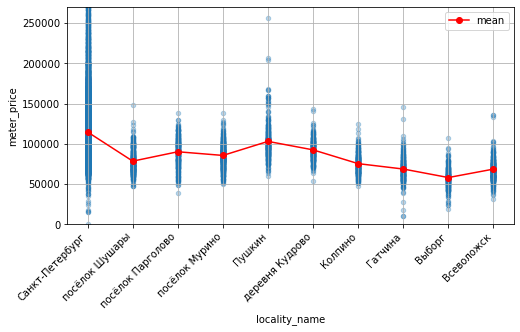

In [55]:
# построим график scatterplot зависимости meter_price от locality_name
ax = (real_estate
 .query('locality_name in @localities.index')   # срез данных из основной таблицы, 
                                                # где locality_name совпадает с индексами из таблицы localities
 .plot(x = 'locality_name',
       y = 'meter_price',
       kind = 'scatter',         # тип графика
       style = 'o',              # отображение данных точками
       alpha = 0.3,              # прозрачность (для визуализации плотности данных)
       figsize = (8, 4),         # размер графика
       ylim = (0, 2.7*10**5),    # пределы по оси y
       )
     )

# сохраним в переменной `locals_list` список районов в таком же порядке, как на графике
locals_list = real_estate.query('locality_name in @localities.index')['locality_name'].unique()
# изменим порядок индексов в localities для корректного отображения медиан на графике.
localities = localities.reindex(locals_list)
# отобразим медианы стоимости квадратного метра на графике с данными
localities.plot(ax=ax,           # копируем оси с предыдущего графика
                y = 'mean',    # медианы стоимости квадратного метра по оси y
                style = '-or',   # стиль кривой - красная линия с точками в местах расчётов
                grid = True      # отобразить сетку на графике
               )

# повернём названия районов на 45 градусов против часовой стрелки
plt.xticks(rotation=45, ha='right')
plt.show()

- Самая высокая средняя стоимость жилья в Санкт-Петербурге: 114694.6 за квадратный метр
- Самая низкая средняя стоимость жилья в Выборге: 58190.1 за квадратный метр


### 4.6 Определение границы центрального района в Санкт-Петербурге

**Задача** — выяснить, какая область входит в центр.  
Выделим квартиры в Санкт-Петербурге (`locality_name`) методом loc и сохраним их в переменной `real_estate_peter`.  
Создадим столбец `dist_center` с расстоянием до центра в километрах, округлим до целых значений.  
Посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра.  
Определим границу, где график сильно меняется — это и будет центральная зона.

In [56]:
# методом query получим срез данных, результат запишем в таблицу real_estate_peter
# сбросим индексы методом reset_index(drop=True)
real_estate_peter = (real_estate
                     .query('locality_name == "Санкт-Петербург"')
                     .reset_index(drop=True)
                    )

# в dist_center запишем расстояние до центра в километрах, округлим значение методом round()
real_estate_peter['dist_center'] = round(real_estate_peter['cityCenters_nearest'] / 1000, 0)

Создадим вспомогательную функцию для отображения графиков scatterplot для квартир в центре Санкт-Петербурга

In [57]:
def peter_last_price_scatter(column, xrange, need_median=False, center_data=False):
    """
    input: column (str) - название столбца для оси X графика
           xrange (tuple) - пределы значений в столбце column для построения графика
           need_median (bool) - флаг для построения кривой медиан (для каегориальных данных по оси X)
           center_data (bool) - флаг для построения данных для квартир в централлььном районе
    output: None
    Функция строит scatteplot зависимости цены за квадратный метр 'meter_price' от параметра column. 
    Дополнительно при need_median=True функция считает медианное значение 'meter_price' для каждого значения column
    и строит кривую median в тех же осях координат.
    При center_data=True, функия сторит такие же графики в тех же осях для квартир в центре города
    Данные берутся из таблицы для квартир Санкт-Петербурга `real_estate_peter` 
    Данные для центра Санкт-Петербурга берутся из таблицы `real_estate_center`
    """
    # построим график scatter зависимости цены за квадратный метр от расстояния до центра
    ax = real_estate_peter.plot(x = column,
                    y = 'last_price',
                    kind = 'scatter',         # тип графика
                    style = 'o',              # отображение данных точками
                    alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                    figsize = (8, 4),         # размер графика
                    ylim = (0, 3.6*10**7),    # пределы по оси y
                    xlim = xrange,
                    grid = True
                    )
    if need_median:
        # сгруппируем данные по расстоянию до центра, посчитаем медианное значение цены за квадратный метр
        (real_estate_peter
         .groupby(column)['last_price']
         .agg(['median'])
         # на тех же осях отобразим кривую изменения медианного значения цены за квадратный метр от расстояния до центра.
         .plot(ax=ax,                   # копируем оси с предыдущего графика
               y = 'median',            # медианы стоимости квадратного метра по оси y
               style = '-or',           # стиль кривой - красная линия с точками в местах расчётов
               legend = True,              # отобразить подпись графика
               label = 'median peter',    # название кривой               
               grid = True              # отобразить сетку на графике
              )
        )
    
    # при необходимости построить данные из другой таблицы на тех же осях
    if center_data:
        real_estate_center.plot(ax=ax,
                              x = column,
                              y = 'last_price',
                              kind = 'scatter',         # тип графика
                              style = 'o',              # отображение данных точками
                              color = 'green',
                              alpha = 0.3,              # прозрачность (для визуализации плотности данных)
                              figsize = (8, 4),         # размер графика
                              xlim = xrange,            # пределы по оси x
                              ylim = (0, 3.6*10**7),    # пределы по оси y
                              grid = True               # отобразить сетку
                              )
        if need_median:
            # сгруппируем объявления по column и найдём медианные значения стоимости квартир для каждой группы
            (real_estate_center
             .groupby(column)['last_price']
             .agg(['median'])
             # отобразим медианы стоимости квартир для разных групп
             .plot(ax = ax,
                   y = 'median',
                   style = '-oy',
                   legend = True,              # отобразить подпись графика
                   label = 'median center',    # название кривой
                   grid = True                 # отобразить сетку
                  )
            )
        
    plt.show()

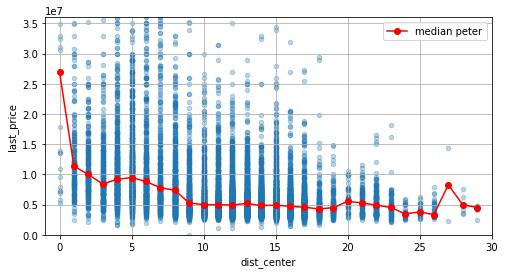

In [58]:
peter_last_price_scatter('dist_center', xrange=(-1,30), need_median=True)

- Цена квартиры начинает быстро расти при расстоянии до центра <= 3 км. Будем считать границу центрадьного района за **3км**.

### 4.7 Исследование квартир в центральном районе Санкт-Петербурга

**1)** Сохраним в таблице `real_estate_center` объявления о квартирах в центре Санкт-петербурга

In [59]:
# Сделаем срез данных из таблицы `real_estate_peter`, где расстояние до центра до 3 метров.
# результат запишем в таблицу `real_estate_center`
real_estate_center = (real_estate_peter
                      .query('dist_center <= 3')
                      .reset_index(drop=True)
                     )

**2)** Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Создадим вспомогательную функцию для построения двух гистограмм (для всех объявлений и квартир в центре Санкт-Петербурга) в одной системе координат для наглядного сравнения различных параметров.

In [60]:
def show_histograms(column, bins, lims):
    """
    input: column (str) - название столбца для построения гистограммы
           bins (int)   - колличество ячеек для гистограмм
           lims (tuple) - пределы значений в столбце column для построения гистограмм
    output: None
    Функция строит две гистограммы из таблиц real_estate и real_estate_center для столбца column
    в одной системе координат. Гистограммы отображают плотности распределения значений для наглядности.
    """
    ax = real_estate_peter.plot(kind = 'hist',
                          y = column,
                          histtype = 'step',       # данный тип удобен для сравнения двух гистограмм
                          bins = bins,
                          range = lims,
                          alpha = 0.5,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # отобразить плотность распределения данных
                          legend = True,           # отобразить пояснение для графиков
                          label = column + ' all'  # строка подписи для графиков
                         )
    real_estate_center.plot(kind = 'hist',
                            y = column,
                            histtype = 'step',
                            ax = ax,               # отобразить график в осях предыдущей гистограммы
                            bins = bins,
                            range = lims,
                            alpha = 0.5,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = column + ' center'
                           )
    # density=True - необходимо для отображения двух гистограмм в одной системе координат.
    plt.show()

count    866.000000
mean      98.682356
std       56.628284
min       12.000000
25%       63.400000
50%       85.000000
75%      116.500000
max      517.000000
Name: total_area, dtype: float64

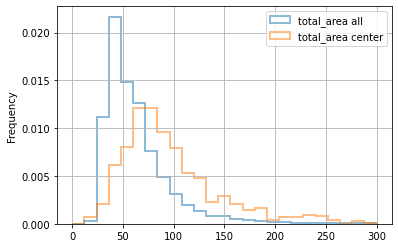

In [61]:
# методом describe посмотрим на численное распределение площади 'total_area' для квартир в центре Санкт-Петербурга
display(real_estate_center['total_area'].describe())

# построим гистаграмму распределения 'total_area' методом hist().
# разделим гистограмму на 25 участков, ограничимся значением 'total_area' < 300 (м²) (99% всех данных)
show_histograms('total_area', bins=25, lims=(0, 300))

- Среднее и медианное значения `total_area` для квартир в центре равны соответственно 98.7 и 85.0.  
Среднее и медианное значения `total_area` для всех квартир в городе более низкие и равны соответственно 64.5 и 55.0.  
- На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

count    8.660000e+02
mean     1.498426e+05
std      1.253362e+05
min      2.891960e+04
25%      9.646785e+04
50%      1.172644e+05
75%      1.513040e+05
max      1.736842e+06
Name: meter_price, dtype: float64

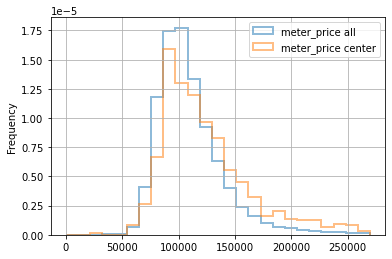

In [62]:
# посмотрим на численное распределение цены за квадратный метр 'meter_price' для квартир в центре Санкт-Петербурга
display(real_estate_center['meter_price'].describe())

# построим гистаграмму распределения 'meter_price' методом hist().
# разделим гистограмму на 25 участков, ограничимся значением 'meter_price' (0, 2.7*10**5) (99% всех данных)
show_histograms('meter_price', bins=25, lims=(0, 2.7*10**5))

- Среднее и медианное значения `meter_price` для квартир в центре равны соответственно 1.25 и 1.17 (\*10^5).  
Среднее и медианное значения `meter_price` для всех квартир более низкие и равны соответственно 1.15 и 1.05 (\*10^5).  
- На гистограммах также видно небольшое смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

count    866.000000
mean       3.121247
std        1.479052
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: rooms, dtype: float64

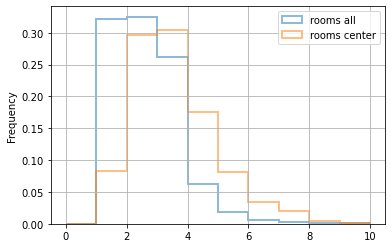

In [63]:
# посмотрим на численное распределение колличества комнат 'rooms' для квартир в центре Санкт-Петербурга
display(real_estate_center['rooms'].describe())

# построим гистаграмму распределения 'rooms' методом hist().
# разделим гистограмму на 10 участков, ограничимся значением 'rooms' (0, 10) (99% всех данных)
show_histograms('rooms', bins=10, lims=(0, 10))

- Среднее и медианное значения `rooms` для квартир в центре равны 3.  
Среднее и медианное значения `rooms` для всех квартир более низкие и равны 2.  
- На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

count    600.000000
mean       3.192267
std        0.337210
min        2.500000
25%        3.000000
50%        3.200000
75%        3.400000
max        4.100000
Name: ceiling_height, dtype: float64

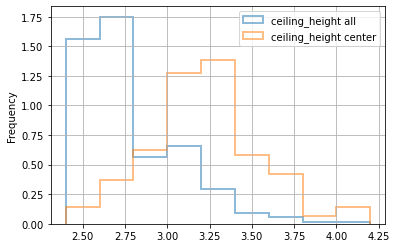

In [64]:
# посмотрим на численное распределение высоты потолков 'ceiling_height' для квартир в центре Санкт-Петербурга
display(real_estate_center['ceiling_height'].describe())

# построим гистаграмму распределения 'ceiling_height' методом hist().
# разделим гистограмму на 9 участков, ограничимся значением 'ceiling_height' (2.4, 4.2) (99% всех данных)
show_histograms('ceiling_height', bins=9, lims=(2.4, 4.2))

- Среднее и медианное значения `ceiling_height` для квартир в центре равны соответственно 3.19 и 3.2.  
Среднее и медианное значения `ceiling_height` для всех квартир более низкие и равны соответственно 2.76 и 2.7.  
- На гистограммах также хорошо видно смещение в сторону больших значений для квартир в центре (с обоих сторон от пиков гистограмм).

**3)** Выделим факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

- Рассмотрим зависимость цены квартиры `last_price` от колличества комнат `rooms` для всех объявлений и для квартир в центре.

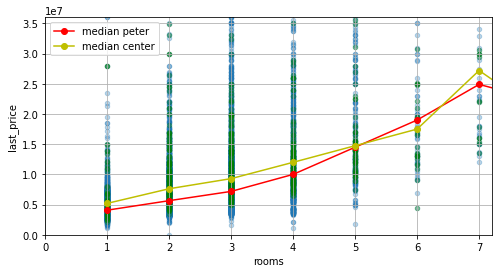

Коэффициент корреляции Пирсона между last_price и rooms по всему городу: 0.369
Коэффициент корреляции Пирсона между last_price и rooms в центре города: 0.237


In [65]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('rooms', xrange=(0, 7.2), need_median=True, center_data=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и rooms по всему городу:', \
      round(real_estate_peter['last_price'].corr(real_estate_peter['rooms']), 3))
print('Коэффициент корреляции Пирсона между last_price и rooms в центре города:', \
      round(real_estate_center['last_price'].corr(real_estate_center['rooms']), 3))

- На рафике видно, что при небольшом колличестве комнат, медианное значение `last_price` немного выше для квартир в центре. При росте числа комнат (6 и выше) разница в цене практически отсутствует. Возможно, данных недостаточно для более точной оценки и информация для большого числа комнат недостоверна.  
- Коэффициент корреляции Пирсона для квартир в центре 0.237, меньше, чем для всего города (0.369). Это может быть обусловлено общей повышенной стоимостью квартир в центре города.  

- Рассмотрим зависимость цены квартиры `last_price` от этажа `floor_cat` для всех объявлений и для квартир в центре.

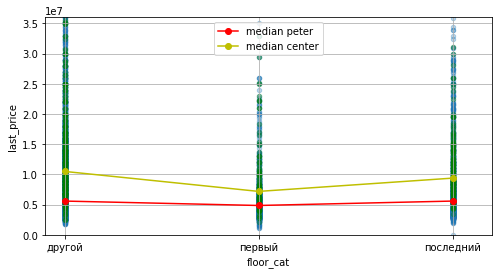

In [66]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('floor_cat', xrange=(-0.1, 2.2), need_median=True, center_data=True)

- На рафике видно, что медианное значение `last_price` немного выше для квартир в центре для всех вариантов `floor_cat`. Это обусловлено общей повышенной стоимостью квартир в центральном районе.

- Рассмотрим зависимость цены квартиры `last_price` от удалённости от центра `cityCenters_nearest` для всех объявлений и для квартир в центре.

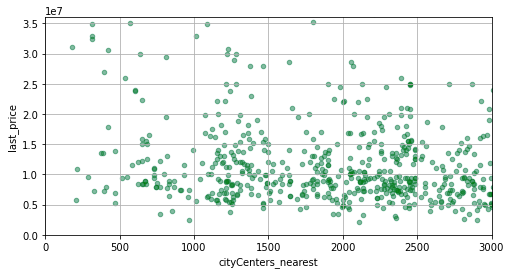

Коэффициент корреляции Пирсона между last_price и cityCenters_nearest для квартир в центре: -0.257
Коэффициент корреляции Пирсона между last_price и cityCenters_nearest для всех квартир: -0.163


In [67]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('cityCenters_nearest', xrange=(0, 3000), center_data=True)

# Определим коэффициент корреляции Пирсона методом corr()
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest для квартир в центре:', \
      round(real_estate_peter['last_price'].corr(real_estate_peter['cityCenters_nearest']), 3))
print('Коэффициент корреляции Пирсона между last_price и cityCenters_nearest для всех квартир:', \
      round(real_estate_center['last_price'].corr(real_estate_center['cityCenters_nearest']), 3))

- Коэффициент корреляции Пирсона для квартир в центре -0.163, немного меньше по абсолютному значению, чем для квартир по всему городу (-0.257). Зависимость между удалённостью от центра ценой за квартиру немного выше у квартир по всему городу. Но для квартир в центре данных не очень много, информация может быть недостоверной.

- Рассмотрим зависимость цены квартиры `last_price` от года `publish_year` для всех объявлений и для квартир в центре.

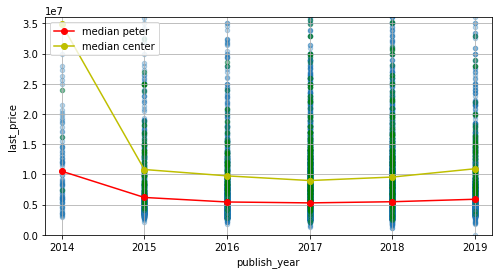

In [68]:
# построим график зависимости функцией last_price_scatter()
peter_last_price_scatter('publish_year', xrange=(2013.8, 2019.2), need_median=True, center_data=True)

- На рафике видно, что медианное значение `last_price` почти в 2 раза выше для квартир в центре для объявлений после 2015 года `publish_year`. Это обусловлено общей повышенной стоимостью квартир в центральном районе.  
- С 2014 по 2015 год для квартир в центральном районе наблюдается более резкий спад в цене, чем для объявлений по всему городу.

### Выводы

- Изучены параметры квартир: площадь, цена, число комнат, высота потолков. Распределения данных близки к распределению Пуассона 
- Аномальные данные (нулевые значения колличества комнат и тд) выявлены, по возможности исправлены, небольшие неправдоподобные выбросы удалены.  
- Изучено время продажи квартир. Распределение близко к Распределению Пуассона. Аномальных пиков в гистограмме не выявлено. Данные сильно смещены влево (среднее значение в 2 раза больше медианного). Бльшинство квартир продаётся за 45-232 дней. Время продажи меньше 4 дней и больше 512 дней можно считать необычными выбросами.  
- Проанализированы факторы, влияющие на стоимость квартиры. Наибольшую корреляцию показали: общая площадь `total_area`, колличество комнат `rooms`, удалённость от центра города `cityCenters_nearest`. Также выявлена зависимость цены от года размещения объявления `publish_year`. Это может быть обусловлено колебаниями рынка недвижимости.
- Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (114694.6), самая дешёвая стоимость квадратного метра в Выборге (58190.1).
- Проанализирована зависимость цены за квадратный метр от расстояния до центра города в Санкт-Петербурге. Граница центрального района около 3 км.
- Рассмотрены факторы, влияющие на стоимость квартиры в Санкт-Петербурге и его центре. Отмечена общая повышенная стоимость квартир в центральном районе. В остальном корреляции не сильно отличаются. Замечен резкий спад в цене за квартиру в центральном районе в период с 2014-2015 гг (примерно в 3.5 раза).

## Шаг 5. Общий вывод

**1)** Данные в таблице real_estate_data.csv о продаже квартир содержат много пропущенной информации (от 5 до 65 % пропусков в различных столбцах). Часть информации могла быть утеряна в результате сбоев системы при загрузке/выгрузке данных. Часть информации могла отсутствовать изначально (объявления не были заполнены на 100%). Информация была восстановлена по существующим данным из других параметров, или оставлениа как есть.   
**2)** Аномальные/неправдоподобные данные были частично исправлены, исходя из данных таблицы. Небольшие выбросы (до 1%), не влияющие на общее распределение данных, были удалены. Также типы данных были исправлены, логики хранящейся информации.  
**3)** Дополнитеьные параметры (цена квадратного метра, год публикации, категории этажа квартиры и тд) были рассчитаны добавлены в исходную таблицу для дальнейших исследований.  
**4)** Распределения параметров квартир: площадь, цена, число комнат, высота потолков, близки к Пуассоновскому. Аномальных пиков после преобразования данных не замечено.  
**5)** Время продажи квартир имеет достаточно большой разброс: 45-232 дней. Выбросами можно считать время меньше 4 дней или больше 512. Это может говорить о нестабильности рынка недвижимости.  
**6)** На стоимость квартиры больше всего влияют параметры: общая площадь, колличество комнат, удалённость от центра. Также замечен спад цен на недвижимость в 2014-2015 гг (особенно для квартир в центральном районе Санкт-Петербурга).  
**7)** Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (114694.6), самая дешёвая стоимость квадратного метра в Выборге (58190.1).  
**8)** Судя по изменению стоимости квартир за квадратный метр, граница центрального района Санкт-петербурга около 3 км.  
**9)** Факторы, влияющие на стоимость квартир в Санкт-Петербурге, выражены сильнее для города в целом, чем для его центрального района (коэффициенты корреляции меньше для центрального района). Но отличия невелики (разница в коэффициентах корреляции Пирсона 0.1-0.15). Это может быть обусловлено общей повышенной стоимостью квартир в центральном районе